In [26]:
## import modules
from keras.applications import vgg16
from keras.models import Model, Sequential
from keras.layers.core import Dense, Flatten
import keras

In [41]:
## import VGG16 model for transfer learning
input_shape= (224, 224, 3)
vgg_model = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

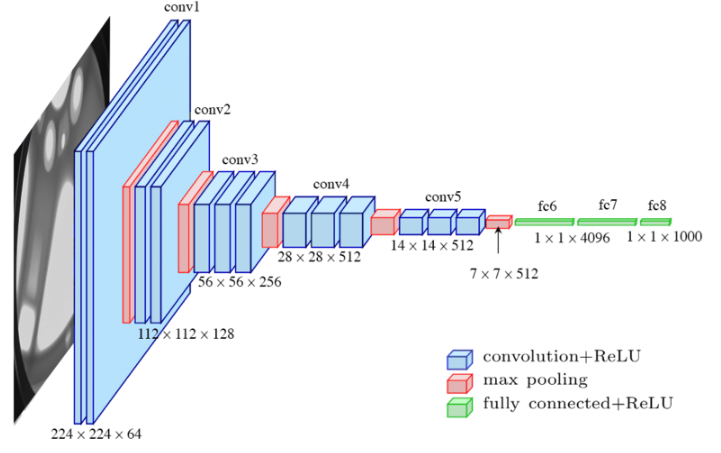

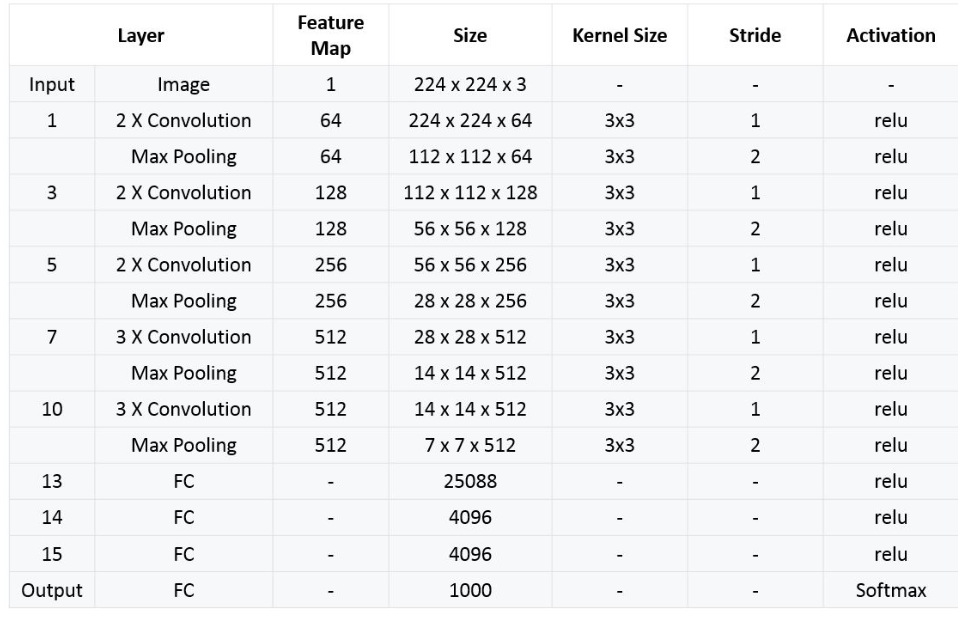

## VGG16 model in Keras
vgg16_model = Sequential()

vgg16_model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu')) <br>
vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) <br>

vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same')) <br>
vgg16_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

vgg16_model.add(Flatten()) <br>
vgg16_model.add(Dense(4096, activation='relu')) <br>
vgg16_model.add(Dense(4096, activation='relu')) <br>
vgg16_model.add(Dense(1000, activation='softmax'))


In [42]:
## Summary of pre-trained VGG model
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [43]:
## Set up trainable layers
for layer in vgg_model.layers[:10]:
    layer.trainable = False

In [52]:
j = 0
for i in vgg_model.layers[:16]:
    j = j + 1
    print("Layer ", j,": ", i, "Weights Trainable:", i.trainable)

Layer  1 :  <keras.engine.input_layer.InputLayer object at 0x000001F6F2FF05C0> Weights Trainable: False
Layer  2 :  <keras.layers.convolutional.Conv2D object at 0x000001F6F2FD2F60> Weights Trainable: False
Layer  3 :  <keras.layers.convolutional.Conv2D object at 0x000001F6F061FDA0> Weights Trainable: False
Layer  4 :  <keras.layers.pooling.MaxPooling2D object at 0x000001F68FAB9D30> Weights Trainable: False
Layer  5 :  <keras.layers.convolutional.Conv2D object at 0x000001F68FAB9E10> Weights Trainable: False
Layer  6 :  <keras.layers.convolutional.Conv2D object at 0x000001F698AE7438> Weights Trainable: False
Layer  7 :  <keras.layers.pooling.MaxPooling2D object at 0x000001F698AE7C88> Weights Trainable: False
Layer  8 :  <keras.layers.convolutional.Conv2D object at 0x000001F698B00940> Weights Trainable: False
Layer  9 :  <keras.layers.convolutional.Conv2D object at 0x000001F698B209B0> Weights Trainable: False
Layer  10 :  <keras.layers.convolutional.Conv2D object at 0x000001F698B3A4A8> We

In [45]:
## add custom layers to pre-trained VGG model
X = vgg_model.output
X1 = Flatten()(X)
X2 = Dense(1024, activation='relu')(X1)
X3 = Dense(1024, activation='relu')(X2)
Target = Dense(15, activation='softmax')(X3)

model_final = Model(input=vgg_model.input, output=Target)

model_final.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [69]:
### Model Parameters Extraction
## Extract parametes from the trained model
weights=[]

print(model_final.layers)

for layer in model_final.layers:
    weight=layer.get_weights()
    weights.append(weight)

[<keras.engine.input_layer.InputLayer object at 0x000001F6F2FF05C0>, <keras.layers.convolutional.Conv2D object at 0x000001F6F2FD2F60>, <keras.layers.convolutional.Conv2D object at 0x000001F6F061FDA0>, <keras.layers.pooling.MaxPooling2D object at 0x000001F68FAB9D30>, <keras.layers.convolutional.Conv2D object at 0x000001F68FAB9E10>, <keras.layers.convolutional.Conv2D object at 0x000001F698AE7438>, <keras.layers.pooling.MaxPooling2D object at 0x000001F698AE7C88>, <keras.layers.convolutional.Conv2D object at 0x000001F698B00940>, <keras.layers.convolutional.Conv2D object at 0x000001F698B209B0>, <keras.layers.convolutional.Conv2D object at 0x000001F698B3A4A8>, <keras.layers.pooling.MaxPooling2D object at 0x000001F698B5F7F0>, <keras.layers.convolutional.Conv2D object at 0x000001F698B77940>, <keras.layers.convolutional.Conv2D object at 0x000001F698B9A9B0>, <keras.layers.convolutional.Conv2D object at 0x000001F698BB44A8>, <keras.layers.pooling.MaxPooling2D object at 0x000001F698BD87F0>, <keras.

In [74]:
print("Number of layers: ", len(weights))

for i in range(0, 23):
    if len(weights[i])== 0:
        print(i+1, "layer in model :", len(weights[i]))
    if len(weights[i])== 2:
        print(i+1, "layer in model :", len(weights[i]))
        print("      weights: ", weights[i][0].shape)
        print("      bias : ", weights[i][1].shape)


Number of layers:  23
1 layer in model : 0
2 layer in model : 2
      weights:  (3, 3, 3, 64)
      bias :  (64,)
3 layer in model : 2
      weights:  (3, 3, 64, 64)
      bias :  (64,)
4 layer in model : 0
5 layer in model : 2
      weights:  (3, 3, 64, 128)
      bias :  (128,)
6 layer in model : 2
      weights:  (3, 3, 128, 128)
      bias :  (128,)
7 layer in model : 0
8 layer in model : 2
      weights:  (3, 3, 128, 256)
      bias :  (256,)
9 layer in model : 2
      weights:  (3, 3, 256, 256)
      bias :  (256,)
10 layer in model : 2
      weights:  (3, 3, 256, 256)
      bias :  (256,)
11 layer in model : 0
12 layer in model : 2
      weights:  (3, 3, 256, 512)
      bias :  (512,)
13 layer in model : 2
      weights:  (3, 3, 512, 512)
      bias :  (512,)
14 layer in model : 2
      weights:  (3, 3, 512, 512)
      bias :  (512,)
15 layer in model : 0
16 layer in model : 2
      weights:  (3, 3, 512, 512)
      bias :  (512,)
17 layer in model : 2
      weights:  (3, 3, 512,

In [46]:
## add custom layers to pre-trained VGG model
## Build new model 2
model_final2 = Sequential()
model_final2.add(vgg_model)
model_final2.add(Flatten())
model_final2.add(Dense(1024, activation='relu'))
model_final2.add(Dense(1024, activation='relu'))
model_final2.add(Dense(15, activation='softmax'))

model_final2.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])
model_final2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_30 (Dense)             (None, 15)                15375     
Total params: 41,470,799
Trainable params: 39,735,311
Non-trainable params: 1,735,488
_________________________________________________________________


In [66]:
### Model Parameters Extraction
## Extract parametes from the trained model
weights2=[]

print(model_final2.layers)

for layer in model_final2.layers:
    weight=layer.get_weights()
    weights2.append(weight)

[<keras.engine.training.Model object at 0x000001F698C68940>, <keras.layers.core.Flatten object at 0x000001F698D0F470>, <keras.layers.core.Dense object at 0x000001F698D0FF98>, <keras.layers.core.Dense object at 0x000001F698D374E0>, <keras.layers.core.Dense object at 0x000001F698E17BE0>]


In [68]:
print("Number of layers: ", len(weights2))
print("1st layer in model :", len(weights2[0]))
for i in range(0, 26):
    if (i%2)== 0:
        print("      weights: ", weights2[0][i].shape)
    else:
        print("      bias : ", weights2[0][i].shape)


print("2nd layer in model :", len(weights2[1]))

print("3rd layer in model :", len(weights2[2]))
print("      weights: ", weights2[2][0].shape)
print("      bias : ", weights2[2][1].shape)

print("4th layer in model :", len(weights2[3]))
print("      weights: ", weights2[3][0].shape)
print("      bias : ", weights2[3][1].shape)

print("5th layer in model :", len(weights2[4]))
print("      weights: ", weights2[4][0].shape)
print("      bias : ", weights2[4][1].shape)

Number of layers:  5
1st layer in model : 26
      weights:  (3, 3, 3, 64)
      bias :  (64,)
      weights:  (3, 3, 64, 64)
      bias :  (64,)
      weights:  (3, 3, 64, 128)
      bias :  (128,)
      weights:  (3, 3, 128, 128)
      bias :  (128,)
      weights:  (3, 3, 128, 256)
      bias :  (256,)
      weights:  (3, 3, 256, 256)
      bias :  (256,)
      weights:  (3, 3, 256, 256)
      bias :  (256,)
      weights:  (3, 3, 256, 512)
      bias :  (512,)
      weights:  (3, 3, 512, 512)
      bias :  (512,)
      weights:  (3, 3, 512, 512)
      bias :  (512,)
      weights:  (3, 3, 512, 512)
      bias :  (512,)
      weights:  (3, 3, 512, 512)
      bias :  (512,)
      weights:  (3, 3, 512, 512)
      bias :  (512,)
2nd layer in model : 0
3rd layer in model : 2
      weights:  (25088, 1024)
      bias :  (1024,)
4th layer in model : 2
      weights:  (1024, 1024)
      bias :  (1024,)
5th layer in model : 2
      weights:  (1024, 15)
      bias :  (15,)


In [77]:
vgg_model